<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Machine-Learning-2023/blob/main/Copy_of_1_3_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 5.83MB/s]


# Polynomial Regression

On some datasets, the optimal function to predict the target variable $y$ given the features $X$ is not a linear function. Alternatively, we can fit a higher order polynomial function of the form:

$$y = a \cdot x + b \cdot x^2 + c \cdot x^3 + .... + z$$

The only change in our workflow is that you have to transform the input data by generating all polynomial combinations of features in $X$.

# Data: Boston Housing data set

In the boston housing set, one of the explanatory variables is LSTAT, which represent the % of lower class people in the population of that region. When we inspect the data, we see that the relationship between LSTAT and the target variable PRICE is slightly more curvy.

In [ ]:
from pipetorch import DFrame
from sklearn.linear_model import LinearRegression

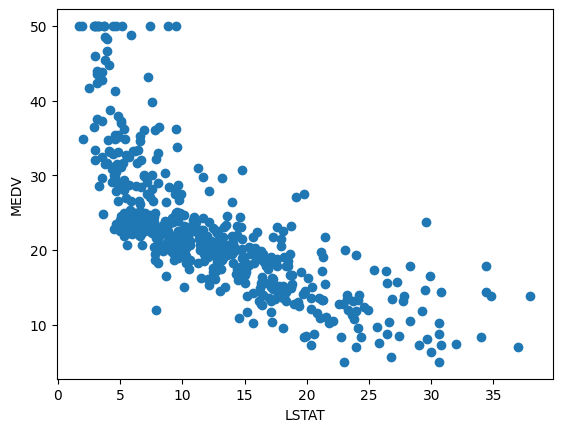

In [ ]:
df = DFrame.read_from_kaggle('fedesoriano/the-boston-houseprice-data')
df = df[['LSTAT', 'MEDV']]
df.train.scatter()

# Model

In [ ]:
# Instantiate a Linear Regression model
model = LinearRegression()

# Train

In [ ]:
# Fit the model on the training set
model.fit(df.train_X, df.train_y);

# Evaluate

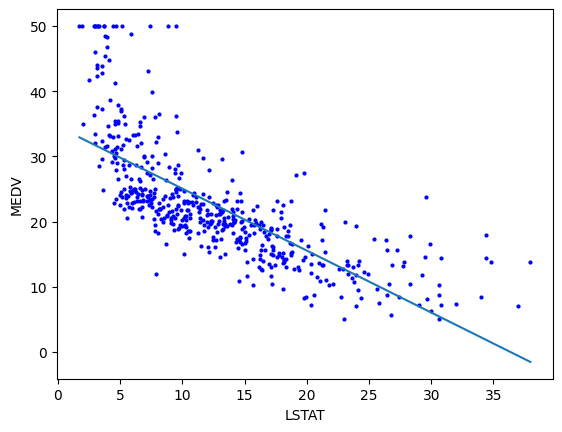

In [ ]:
# Create a scatter plot of the training points, with the model predictions on top
df.train.scatter(color='b', s=4)
df.train.line(y=model.predict)

# Root Mean Squared Error

Now we see that a linear function is not appropriate for this data. But it is hard to see how much better we can do. What we can do to improve out evaluation is to compute how much on average the prediction of our model is off from the actual value. The formula for this is the root mean squared error (RMSE). To compute it, you can use the `mean_squared_error` function in SKLearn, together with the squared root function `sqrt` in the math library.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# compute the root mean squared error of the model
difference = model.predict(df.train_X) - df.train_y
sqrt(mean_squared_error(df.train_y, model.predict(df.train_X)))

6.20346413142642

# Data with Polynomial combinations

We now expand the dataset with all polynomial combinations in $X$ up to a certain `degree`.

In [ ]:
# add polynomials with degree=3
p = df.polynomials(degree=3)

# Model

In [ ]:
# Instantiate a new Linear Regression model
model = LinearRegression()

# Train

In [ ]:
# fit the model on the training set with degree=2 polynomials
p = df.polynomials(degree=2)
model.fit(p.train_X, p.train_y)

LinearRegression()

# Evaluate

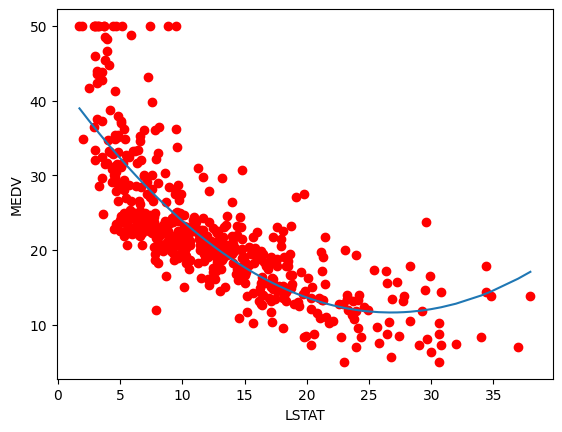

In [ ]:
# Create a scatter plot of the training points
# with the model predictions on top
p.train.scatter(color='r')
p.train.line(y=model.predict)

# Root Mean Squared Error

You probably see that a third order polynomial is a better fit than the linear model. To express this into a useful metric, compute how far the predicted value of this model are off from the correct housing prices

In [ ]:
# compute the root mean squared error of the model
sqrt(mean_squared_error(p.train_y, model.predict(p.train_X)))

5.507315142231622

# Experiment

Now try out several degrees... what seems to be the optimal value for `degree`?

6.20346413142642
5.507315142231622
5.374416277067973
5.253963423025466


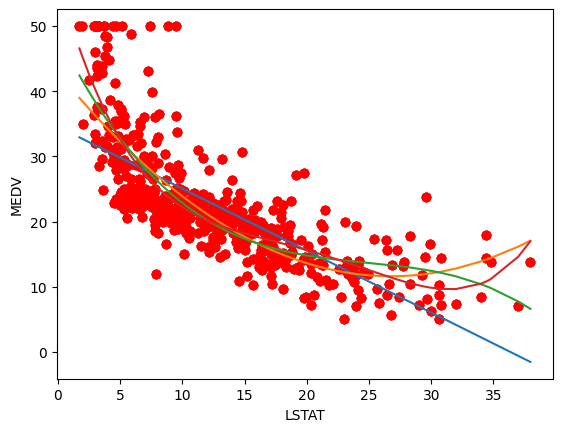

In [ ]:
for t in range(1,5):
  model = LinearRegression()
  p = df.polynomials(degree=t)
  model.fit(p.train_X, p.train_y)
  p.train.scatter(color='r')
  p.train.line(y=model.predict)
  print(sqrt(mean_squared_error(p.train_y, model.predict(p.train_X))))


In [ ]:
halt_notebook()